In [4]:
# fundamentals
import os, sys, glob
import numpy as np
import pandas as pd
from calendar import monthrange, month_name
import scipy.stats as stats
import datetime as dt
import imp
from scipy import stats
%load_ext autoreload
%autoreload 2

# plotting libraries and setup
from matplotlib.colors import BoundaryNorm
import matplotlib.pyplot as plt
%matplotlib inline

fs = 12
plt.rc('font', family='serif')
plt.rc('font', size=fs)
plt.rc('facecolor', )

# met mast functions and utilities
sys.path.append('../')
import met_funcs as MET
import vis as vis
import utils as utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# paths (must mount volume smb://nrel.gov/)
towerID = 'M5'
metPathLoHz = '/Volumes/shared/Wind/WindWeb/MetData/135mData/{}Twr/10min/txt'.format(towerID)
figPath = '../../figs/{}'.format(towerID)
try:
    os.makedirs(figPath)
except:
    pass

In [6]:
# time range
years  = [ int(a) for a in np.arange(2018,2019,1) ] #
months = [ int(a) for a in np.arange(3,6,1) ]

inputfiles = [] # list of files to be read into metdata object
filecount = 0

for year in years:
    for month in months:
        fName = glob.glob(os.path.join(metPathLoHz,'{0}_{1}.txt'.format(year,month_name[month])))        
        if len(fName)>0:
            fName = fName[0] 
            inputfiles.append(fName)
print('{} files to be read into MetData'.format(len(inputfiles)))


3 files to be read into MetData


In [19]:
metdat = MET.load_met_data(inputfiles, verbose=False)
metdat.sort_index(inplace=True)
metdat, catinfo = MET.fix_data_for_transfer(metdat, fix_pressure=False)

/Users/nhamilto/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


number of data columns: 93
number of QC columns: 106


`catinfo` contains all of the categorical information about the data channels of interest. You might want to revisit how these are separated, or just load up the data and parse columns yourself. I'm not sure if we were interested in the same things.

In [8]:
list(catinfo['columns'])

['air density',
 'air pressure',
 'air temperature',
 'coherent tke',
 'direction',
 'gradient richardson',
 'monin-obukhov length',
 'relative humidity',
 'speed',
 'stability parameter z/l',
 'ti',
 'turbulent kinetic energy',
 'wind shear',
 'wind veer']

In [9]:
list(catinfo['columns']['speed'])

['Speed (cup_ 130 m)',
 'Speed (cup_ 130 m) QC',
 'Speed (cup_ 130 m).1',
 'Speed (cup_ 130 m) QC.1',
 'Speed (cup_ 122 m)',
 'Speed (cup_ 122 m) QC',
 'Speed (cup_ 122 m).1',
 'Speed (cup_ 122 m) QC.1',
 'Speed (cup_ 105 m)',
 'Speed (cup_ 105 m) QC',
 'Speed (cup_ 105 m).1',
 'Speed (cup_ 105 m) QC.1',
 'Speed (cup_ 87 m)',
 'Speed (cup_ 87 m) QC',
 'Speed (cup_ 87 m).1',
 'Speed (cup_ 87 m) QC.1',
 'Speed (cup_ 80 m)',
 'Speed (cup_ 80 m) QC',
 'Speed (cup_ 80 m).1',
 'Speed (cup_ 80 m) QC.1',
 'Speed (cup_ 55 m)',
 'Speed (cup_ 55 m) QC',
 'Speed (cup_ 55 m).1',
 'Speed (cup_ 55 m) QC.1',
 'Speed (cup_ 38 m)',
 'Speed (cup_ 38 m) QC',
 'Speed (cup_ 38 m).1',
 'Speed (cup_ 38 m) QC.1',
 'Speed (cup_ 30 m)',
 'Speed (cup_ 30 m) QC',
 'Speed (cup_ 30 m).1',
 'Speed (cup_ 30 m) QC.1',
 'Speed (cup_ 10 m)',
 'Speed (cup_ 10 m) QC',
 'Speed (cup_ 10 m).1',
 'Speed (cup_ 10 m) QC.1',
 'Speed (cup_ 3 m)',
 'Speed (cup_ 3 m) QC',
 'Speed (cup_ 3 m).1',
 'Speed (cup_ 3 m) QC.1',
 'Speed (son

In [10]:
metdat[catinfo['columns']['speed']].describe()

,Speed (cup_ 130 m),Speed (cup_ 130 m) QC,Speed (cup_ 130 m).1,Speed (cup_ 130 m) QC.1,Speed (cup_ 122 m),Speed (cup_ 122 m) QC,Speed (cup_ 122 m).1,Speed (cup_ 122 m) QC.1,Speed (cup_ 105 m),Speed (cup_ 105 m) QC,...,Speed (sonic_100m),Speed (sonic_100m) QC,Speed (sonic_74m),Speed (sonic_74m) QC,Speed (sonic_61m),Speed (sonic_61m) QC,Speed (sonic_41m),Speed (sonic_41m) QC,Speed (sonic_15m),Speed (sonic_15m) QC
count,13200.000000,13200.000000,0.0,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,...,8420.000000,13200.000000,0.0,13200.000000,12920.000000,13200.000000,8713.000000,13200.000000,12701.000000,13200.000000
mean,4.784075,0.997803,NaN,0.997803,4.638317,0.987348,4.505860,0.987348,4.647725,0.990682,...,4.242095,0.294470,NaN,-0.999545,4.480417,0.967121,3.967934,0.325227,3.755841,0.948712
std,3.687578,0.064515,NaN,0.064515,3.610303,0.157853,3.589923,0.157853,3.593388,0.135365,...,3.125331,0.942727,NaN,0.021316,3.393431,0.231560,2.793052,0.942823,2.718656,0.262325
min,0.000000,-1.000000,NaN,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,...,0.008629,-1.000000,NaN,-1.000000,0.044813,-1.000000,0.065730,-1.000000,0.020673,-1.000000
25%,2.376702,1.000000,NaN,1.000000,2.331825,1.000000,2.206308,1.000000,2.372087,1.000000,...,2.253405,-1.000000,NaN,-1.000000,2.291361,1.000000,2.216110,-1.000000,2.089547,1.000000
50%,3.750754,1.000000,NaN,1.000000,3.681169,1.000000,3.566165,1.000000,3.650574,1.000000,...,3.539716,1.000000,NaN,-1.000000,3.574607,1.000000,3.359020,1.000000,3.082902,1.000000
75%,6.024088,1.000000,NaN,1.000000,5.828098,1.000000,5.697055,1.000000,5.752091,1.000000,...,5.219853,1.000000,NaN,-1.000000,5.588294,1.000000,4.903261,1.000000,4.480173,1.000000
max,32.105683,1.000000,NaN,1.000000,31.175015,1.000000,30.998568,1.000000,31.443301,1.000000,...,27.618931,1.000000,NaN,0.000000,28.781641,1.000000,25.834273,1.000000,24.747083,1.000000


/Users/nhamilto/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1301: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


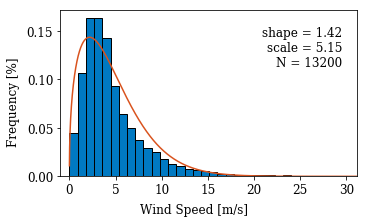

In [11]:
varcol, vertloc, _= utils.get_vertical_locations(catinfo['columns']['speed'], location=87)

fig,ax = vis.hist(metdat, catinfo, 'speed', vertloc=122, fit='weibull')
# fig.savefig(os.path.join(figPath,'speed_hist_fits.png'), dpi=200, bbox_inches='tight')

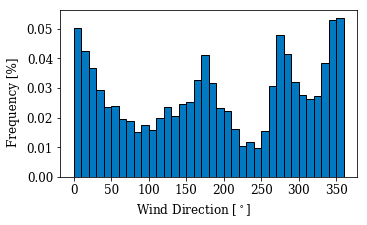

In [12]:
fig,ax = vis.hist(metdat, catinfo, 'direction', vertloc=122, bins=36)
# fig.savefig(os.path.join(figPath,'windhist_fullyear.png'), dpi=200, bbox_inches='tight')

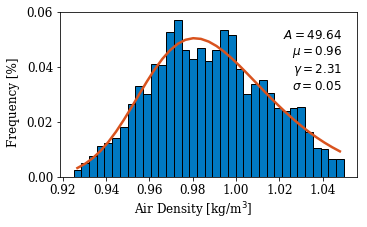

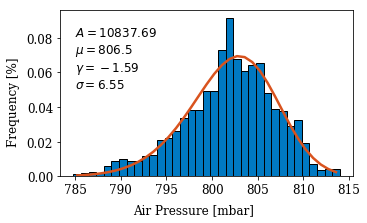

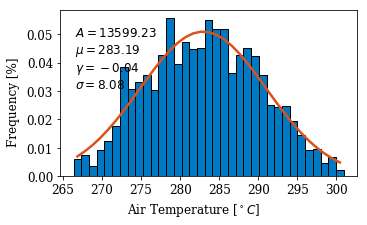

In [13]:
cats = ['air density', 'air pressure', 'air temperature']
gamma = [4.0, 4.0, -10]
for ic,cat in enumerate(cats):
    varcol, varheight, _ = utils.get_vertical_locations(catinfo['columns'][cat], location=122)
    fig, ax = vis.hist(metdat, catinfo, cat, bins=35, vertloc=122)
    vis.fit_skewedgaussian(metdat[varcol].dropna(),bins=35, ax=ax, gamma=gamma[ic])#, xy=(1.35,0.9))
    savecat = catinfo['save'][cat]
#     catfigpath = os.path.join(figPath,savecat)
#     fig.savefig(os.path.join(figPath,'{}_{}_hist_{}_fit.png'.format(towerID, savecat, varheight)), dpi=200, bbox_inches='tight')


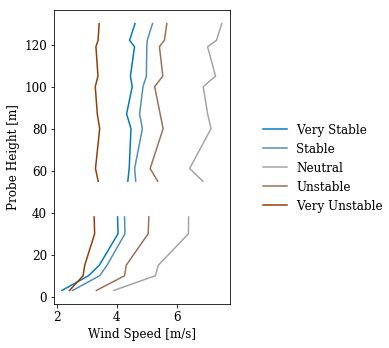

In [20]:
cat = 'speed'
fig,ax = vis.stability_profile(metdat, catinfo, cat)
savecat = catinfo['save'][cat]
# fig.savefig(os.path.join(figPath,'{}_{}_stability_profile.png'.format(towerID, savecat, varheight)), dpi=200, bbox_inches='tight')


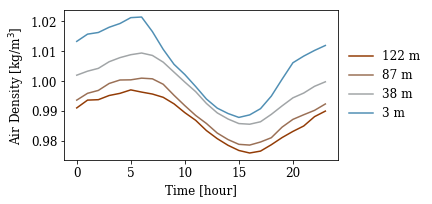

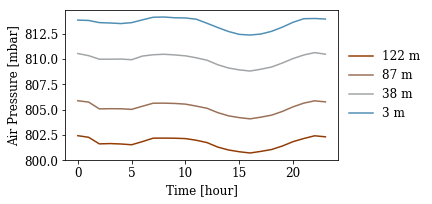

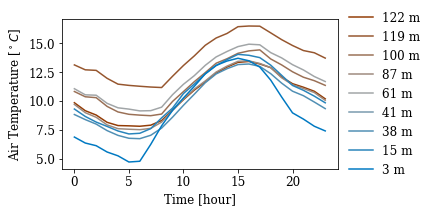

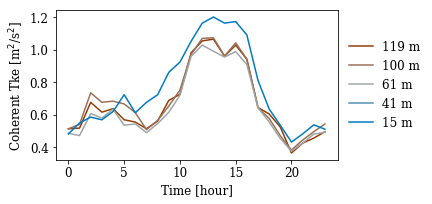

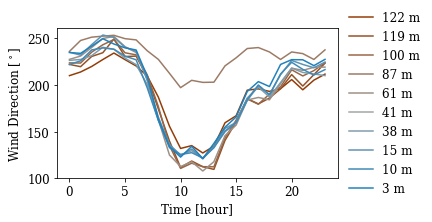

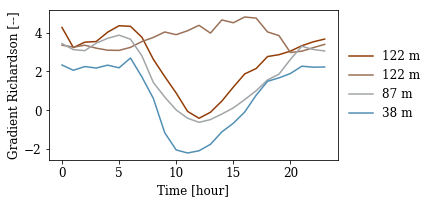

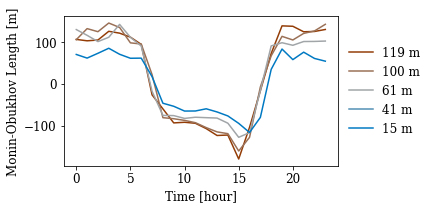

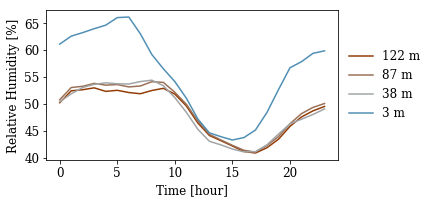

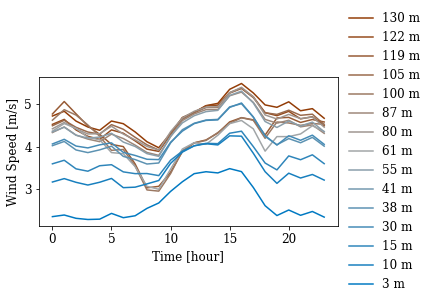

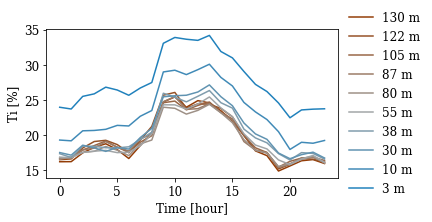

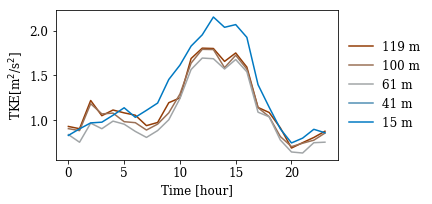

In [21]:
for cat in catinfo['columns']:
    if 'shear' in cat:
        continue
    if 'veer' in cat:
        continue    
    if 'stability' in cat:
        continue 
    fig, ax = vis.hourlyplot(metdat, catinfo, cat)
#     fig.savefig(os.path.join(figPath,'{}_{}_hourly.png'.format(towerID, cat)), bbox_inches='tight', dpi=200)
#     fig.clf()

/Users/nhamilto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/Users/nhamilto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/Users/nhamilto/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:991: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


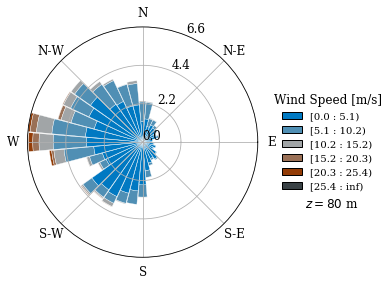

In [32]:
fig,ax,leg = vis.rose_fig(metdat, catinfo, cat)

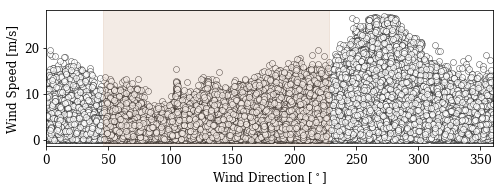

In [22]:
imp.reload(vis)
fig, ax = vis.winddir_scatter(metdat, catinfo, cat, vertloc=87)

In [40]:
metdat[catinfo['columns']['stability flag'][1]]

Date
2018-02-28 17:00:00-07:00           Stable
2018-02-28 17:10:00-07:00      Very Stable
2018-02-28 17:20:00-07:00         Unstable
2018-02-28 17:30:00-07:00          Neutral
2018-02-28 17:40:00-07:00      Very Stable
2018-02-28 17:50:00-07:00      Very Stable
2018-02-28 18:00:00-07:00          Neutral
2018-02-28 18:10:00-07:00           Stable
2018-02-28 18:20:00-07:00      Very Stable
2018-02-28 18:30:00-07:00          Neutral
2018-02-28 18:40:00-07:00          Neutral
2018-02-28 18:50:00-07:00         Unstable
2018-02-28 19:00:00-07:00      Very Stable
2018-02-28 19:10:00-07:00           Stable
2018-02-28 19:20:00-07:00      Very Stable
2018-02-28 19:30:00-07:00      Very Stable
2018-02-28 19:40:00-07:00      Very Stable
2018-02-28 19:50:00-07:00    Very Unstable
2018-02-28 20:00:00-07:00          Neutral
2018-02-28 20:10:00-07:00          Neutral
2018-02-28 20:20:00-07:00          Neutral
2018-02-28 20:30:00-07:00      Very Stable
2018-02-28 20:40:00-07:00      Very Stable
2018-0

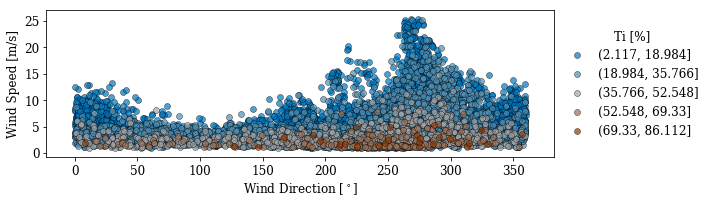

In [41]:
fig,ax = vis.groupby_scatter(metdat, catinfo, cat, 'direction', 'ti')
fig.set_size_inches(8,3)
fig.tight_layout()
fig.savefig(os.path.join(figPath,))

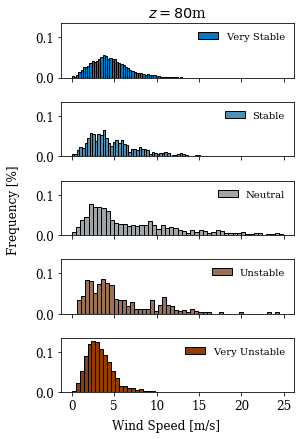

In [42]:
fig,ax = vis.hist_by_stability(metdat, catinfo, cat)

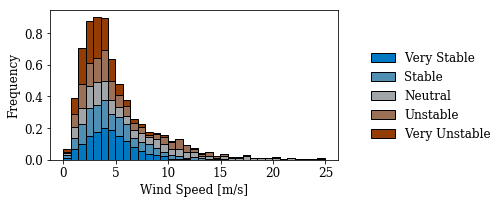

In [43]:
imp.reload(vis)
fig,ax = vis.stacked_hist_by_stability(metdat,catinfo,cat)